In [3]:
# Image Smoothing Techniques: Average and Gaussian Filters

# Step 1: Define Purpose of Filters
# - The Average filter (or mean filter) smooths the image by averaging pixel values in a specified neighborhood.
#   This filter reduces noise but can blur details and edges.
# - The Gaussian filter applies a Gaussian function to smooth the image, giving more weight to pixels closer
#   to the center of the filter kernel. This filter reduces noise while retaining more of the image structure
#   than an average filter.

# Step 2: Define the Application Order and Expected Effects
# - Applying the filters in different orders produces different effects:
#   1. **Average Filter First, Then Gaussian Filter**:
#      - The average filter initially reduces high-frequency noise broadly across the image.
#      - The Gaussian filter then smooths out any remaining noise with finer control, resulting in an image with
#        more emphasis on larger, low-frequency features.
#      - This order creates a smoother image by first removing minor noise with the average filter and then
#        refining the result with the Gaussian filter.
#   2. **Gaussian Filter First, Then Average Filter**:
#      - The Gaussian filter first applies a gentle smoothing effect, reducing noise while keeping edges more defined.
#      - The average filter then further blurs the image uniformly, which can lead to more generalized smoothing.
#      - This order results in an image with softer edges, as the average filter adds a second layer of blurring,
#        which can obscure fine details more significantly.

# Step 3: Practical Applications
# - Applying both filters successively can provide a strong noise reduction effect, useful in applications
#   where fine details are less important and overall noise reduction is a priority.
# - Typically, choosing one filter with an appropriate kernel size is sufficient, as using both can lead to
#   excessive blurring in some cases.

# Step 4: Define Kernel Sizes
# - Use a 3x3, 5x5, or 7x7 kernel for both filters, based on the image resolution and desired level of smoothing.
# - Larger kernels result in greater smoothing but can also blur important details.

# Step 5: Display the Images to Compare Effects
# - Display the original image and filtered images side by side to observe the effects of each filter.
# - Note the differences in edge sharpness, noise levels, and overall clarity for each method.

# Step 6: Experiment and Adjust
# - Experimenting with different kernel sizes and filter orders can help you find the optimal settings
#   for a particular image and task.


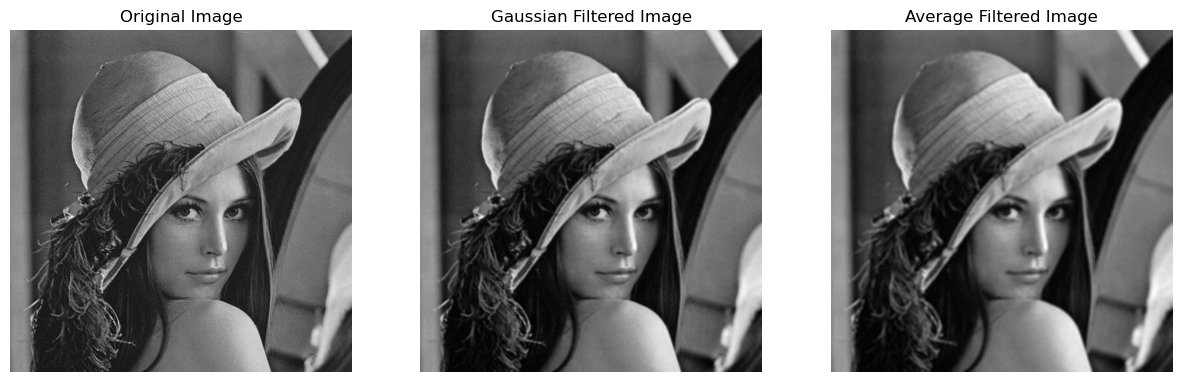

In [1]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

def gaussian_filter(size, sigma=None):
    """
    Generates a Gaussian filter (kernel) with specified size and standard deviation (sigma).
    """
    if size % 2 == 0:
        raise ValueError("Filter size must be an odd number.")
    
    if sigma is None:
        sigma = size / 6.0
    
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    
    for i in range(size):
        for j in range(size):
            x, y = i - center, j - center
            kernel[i, j] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    kernel /= 2 * np.pi * sigma**2
    kernel /= kernel.sum()
    
    return kernel

def average_filter(size):
    """
    Generates an average filter (kernel) with specified size.
    """
    if size % 2 == 0:
        raise ValueError("Filter size must be an odd number.")
    
    # Create an average filter with equal weights
    kernel = np.ones((size, size), dtype=np.float32)
    kernel /= kernel.sum()  # Normalize the kernel by dividing by total elements
    
    return kernel

# Load the image
lena_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')
image = cv2.imread(lena_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise IOError("Image file not found or unable to load.")

# Apply Gaussian filter
gaussian_kernel = gaussian_filter(size=5, sigma=1)
gaussian_filtered_image = cv2.filter2D(image, -1, gaussian_kernel)

# Apply Average filter
average_kernel = average_filter(size=5)
average_filtered_image = cv2.filter2D(image, -1, average_kernel)

# Display original, Gaussian filtered, and Average filtered images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Average Filtered Image")
plt.imshow(average_filtered_image, cmap='gray')
plt.axis("off")

plt.show()


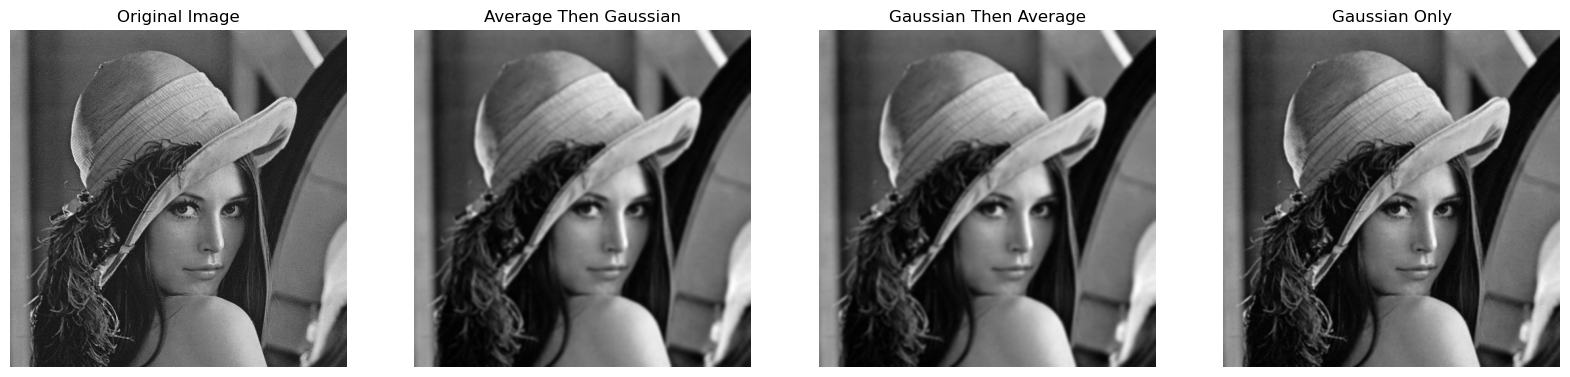

In [2]:
# Apply Average Filter First, Then Gaussian Filter
average_then_gaussian = cv2.filter2D(cv2.filter2D(image, -1, average_kernel), -1, gaussian_kernel)

# Apply Gaussian Filter First, Then Average Filter
gaussian_then_average = cv2.filter2D(cv2.filter2D(image, -1, gaussian_kernel), -1, average_kernel)

# Display the results to compare
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Average Then Gaussian")
plt.imshow(average_then_gaussian, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Gaussian Then Average")
plt.imshow(gaussian_then_average, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Gaussian Only")
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis("off")

plt.show()
